# Proyek Recommendation System

- **Nama:** Alisha Anggranidi Salsabila
- **Email:** anggranidi@gmail.com
- **ID Dicoding:** MC012D5X2354



## Data Understanding

Mengimpor library yang diperlukan untuk seluruh proyek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

## Data Loading

Mengunduh dataset dari kaggle: https://www.kaggle.com/datasets/meirnizri/cellphones-recommendations

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d meirnizri/cellphones-recommendations

Dataset URL: https://www.kaggle.com/datasets/meirnizri/cellphones-recommendations
License(s): ODbL-1.0
  0% 0.00/5.23k [00:00<?, ?B/s]
100% 5.23k/5.23k [00:00<00:00, 22.3MB/s]


In [3]:
#unzip dataset
!unzip cellphones-recommendations.zip
print("Unzip data berhasil dilakukan")

Archive:  cellphones-recommendations.zip
  inflating: cellphones data.csv     
  inflating: cellphones ratings.csv  
  inflating: cellphones users.csv    
Unzip data berhasil dilakukan


****
Mengganti nama file agar lebih praktis saat digunakan.

- cellphones data.csv → cdata.csv
- cellphones rating.csv → crating.csv
- cellphones users.csv → cusers.csv










In [4]:
#change nama file
!mv 'dataset/cellphones data.csv' 'cdata.csv'
!mv 'dataset/cellphones ratings.csv' 'cratings.csv'
!mv 'dataset/cellphones users.csv' 'cusers.csv'

Hasil dari kode di atas menunjukkan bahwa dataset terdiri dari 3 file .csv, yaitu:

1. cellphones data.csv: Menyimpan informasi mengenai data cellphone, seperti nama brand, nama cellphone, sistem operasi, dan lain-lain.
2. cellphones ratings.csv: Berisi informasi tentang cellphone dan rating yang diberikan oleh pengguna terhadap cellphone tersebut.
3. cellphones users.csv: Menyimpan data identitas pengguna, seperti usia, jenis kelamin, dan pekerjaan.

In [5]:
#menyimpan csv pada suatu variabel
data = pd.read_csv('cdata.csv')
ratings = pd.read_csv('cratings.csv')
users = pd.read_csv('cusers.csv')

In [6]:
#show info dari dataset data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cellphone_id      33 non-null     int64  
 1   brand             33 non-null     object 
 2   model             33 non-null     object 
 3   operating system  33 non-null     object 
 4   internal memory   33 non-null     int64  
 5   RAM               33 non-null     int64  
 6   performance       33 non-null     float64
 7   main camera       33 non-null     int64  
 8   selfie camera     33 non-null     int64  
 9   battery size      33 non-null     int64  
 10  screen size       33 non-null     float64
 11  weight            33 non-null     int64  
 12  price             33 non-null     int64  
 13  release date      33 non-null     object 
dtypes: float64(2), int64(8), object(4)
memory usage: 3.7+ KB


****
Hasil dari kode di atas menunjukkan informasi berikut:

- Jumlah baris sebanyak 33 dan kolom sebanyak 14
- Terdapat 10 kolom dengan tipe data numerik dan 4 kolom dengan tipe data objek

In [6]:
#show 5 data dari variabel data
data.head()

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,24/09/2021
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,24/09/2021
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,24/09/2021


In [7]:
#show info dari dataset ratings
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       990 non-null    int64
 1   cellphone_id  990 non-null    int64
 2   rating        990 non-null    int64
dtypes: int64(3)
memory usage: 23.3 KB


****
Hasil dari kode di atas menunjukkan Jumlah baris sebanyak 990 dan 3 kolom dengan 3 kolom bertipe data numerik

In [8]:
#show 5 data dari variabel ratings
ratings.head()

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2


In [9]:
#show info dari dataset users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     99 non-null     int64 
 1   age         99 non-null     int64 
 2   gender      99 non-null     object
 3   occupation  98 non-null     object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


****
Hasil dari kode di atas menunjukkan informasi berikut:

- Terdiri dari 99 baris dan 4 kolom
- 2 kolom bertipe data numerik dan 2 kolom bertipe data object

In [10]:
#show 5 data dari variabel users
users.head()

,user_id,age,gender,occupation
0,0,38,Female,Data analyst
1,1,40,Female,team worker in it
2,6,55,Female,IT
3,8,25,Female,Manager
4,10,23,Male,worker


## Univariate Exploratory Data Analysis

Daftar variabel pada masing-masing dataset:

1. data:
* `cellphone_id`: Unik ID untuk setiap ponsel.
* `brand`: Merek ponsel.
* `model`: Model ponsel.
* `operating system`: Sistem operasi yang digunakan oleh ponsel.
* `internal memory`: Kapasitas memori internal ponsel dalam GB.
* `RAM`: Kapasitas RAM ponsel dalam GB.
* `performance`: Skor kinerja ponsel.
* `main camera`: Resolusi kamera utama dalam MP.
* `selfie camera`: Resolusi kamera depan dalam MP.
* `battery size`: Kapasitas baterai ponsel dalam mAh.
* `screen size`: Ukuran layar ponsel dalam inci.
* `weight`: Berat ponsel dalam gram.
* `price`: Harga ponsel dalam USD.
* `release date`: Tanggal rilis ponsel.

2. rating:
* `user_id`: Unik ID untuk setiap pengguna.
* `cellphone_id`: Unik ID untuk setiap ponsel (merujuk pada cellphones_data).
* `rating`: Nilai rating yang diberikan pengguna untuk ponsel tertentu (skala 1-10).

3. user:

* `user_id`:Unik ID untuk setiap pengguna.
* `age`: Usia pengguna.
* `gender`: Jenis kelamin pengguna.
* `occupation`: Pekerjaan pengguna.


### Data

Menguji jumlah cellphone berdasarkan setiap brand










Total seluruh brand:  10
brand
Samsung     8
Apple       6
Motorola    4
OnePlus     4
Xiaomi      4
Google      3
Asus        1
Oppo        1
Vivo        1
Sony        1
Name: count, dtype: int64


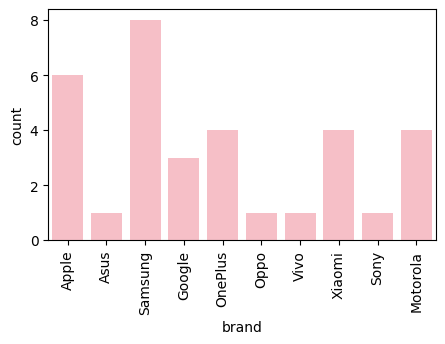

In [11]:
print('Total seluruh brand: ',len(data.brand.unique()))

#masing-masing brand
brand_counts = data['brand'].value_counts()
print(brand_counts)

#show grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['brand'], color='#FFB6C1')
plt.xticks(rotation=90)
plt.show()

Hasil dari kode di atas menunjukkan informasi berikut:

- Terdapat 10 brand yang berbeda
- Brand dengan jumlah ponsel terbanyak adalah Samsung
- Sedangkan brand dengan jumlah ponsel paling sedikit adalah Asus, Oppo, Vivo, dan Sony

****
Menampilkan seluruh jenis model cellphone

In [13]:
model_counts = data['model'].value_counts()
print('Total seluruh cellphone: ', len(model_counts))
model_counts

Total seluruh cellphone:  33


,count
model,
iPhone SE (2022),1
iPhone 13 Mini,1
iPhone 13,1
iPhone 13 Pro,1
iPhone 13 Pro Max,1
iPhone XR,1
Zenfone 8,1
Galaxy A13,1
Galaxy A32,1


Berdasarkan hasil dari kode di atas, terdapat 33 model cellphone yang berbeda

****
Menghitung jumlah operating system untuk setiap kategori

operating system
Android    27
iOS         6
Name: count, dtype: int64


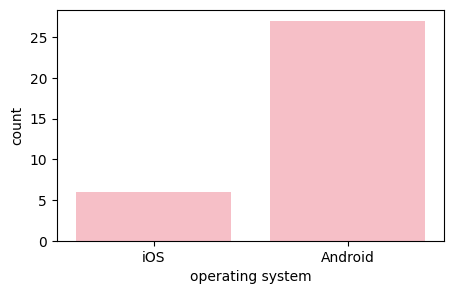

In [14]:
os_counts = data['operating system'].value_counts()
print(os_counts)

#show grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['operating system'], color='#FFB6C1')
plt.show()

Hasil dari kode di atas menunjukkan bahwa terdapat dua kategori sistem operasi, dengan tipe sistem operasi Android memiliki jumlah terbanyak, yaitu 27

****
Menghitung seluruh internal memory untuk setiap kategori

internal memory
128    20
256     6
64      3
32      3
512     1
Name: count, dtype: int64


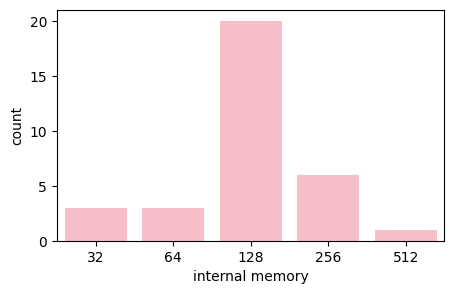

In [15]:
internal_memory_counts = data['internal memory'].value_counts()
print(internal_memory_counts)

#show grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['internal memory'], color='#FFB6C1')
plt.show()

Hasil dari kode di atas menunjukkan informasi berikut:

- Terdapat 5 kategori memori internal.
- Kategori memori internal 128 GB memiliki jumlah terbanyak, yaitu 20 unit, sementara kategori memori internal 512 GB memiliki jumlah paling sedikit, hanya 1 unit

****
Menghitung seluruh RAM untuk setiap kategori

RAM
8     13
4      6
6      6
3      4
12     4
Name: count, dtype: int64


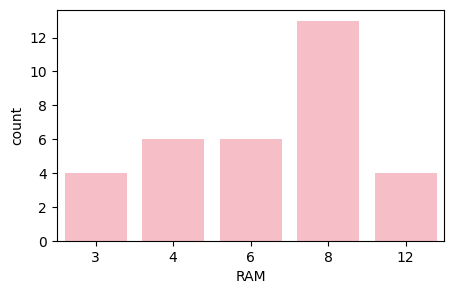

In [16]:
RAM_counts = data['RAM'].value_counts()
print(RAM_counts)

#show grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['RAM'], color='#FFB6C1')
plt.show()

Hasil dari kode di atas menunjukkan informasi berikut:

- Terdapat 5 kategori RAM.
- Kategori RAM 8 memiliki jumlah terbanyak, yaitu 13.
- Kategori RAM 3 dan RAM 12 memiliki jumlah paling sedikit, masing-masing 4.

****
Menampilkan analisis untuk kolom 'performance'. Analisis dilakukan dengan membagi kolom tersebut menjadi dua kategori karena nilai yang ada sangat bervariasi

Jumlah data dengan performance lebih dari 5: 23
Jumlah data dengan performance kurang dari sama dengan 5: 10


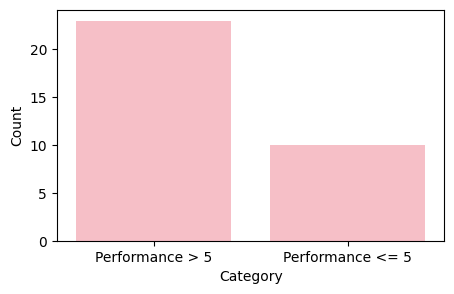

In [17]:
#filter
performance_above5 = data[data['performance'] > 5]
performance_below5 = data[data['performance'] <= 5]

#count
total_above5 = len(performance_above5)
total_below5 = len(performance_below5)

print('Jumlah data dengan performance lebih dari 5:', total_above5)
print('Jumlah data dengan performance kurang dari sama dengan 5:', total_below5)

performance_data = pd.DataFrame({
    'Category' : ['Performance > 5', 'Performance <= 5'],
    'Count' : [total_above5, total_below5]
})
#show grafik
plt.figure(figsize=(5, 3))
sns.barplot(data=performance_data, x='Category', y='Count', color='#FFB6C1')
plt.show()

Hasil dari kode di atas: Terdapat 23 ponsel dengan skor kinerja lebih dari lima, sementara 10 ponsel lainnya memiliki skor kinerja kurang dari lima



















****
Menghitung jumlah main camer untuk setiap kategori

main camera
50     13
12     10
64      4
48      2
108     2
13      2
Name: count, dtype: int64


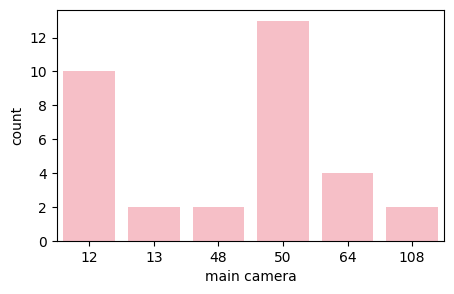

In [18]:
mainCamera_counts = data['main camera'].value_counts()
print(mainCamera_counts)

#show grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['main camera'], color='#FFB6C1')
plt.show()

Hasil dari kode di atas menunjukkan informasi berikut:

- Terdapat 6 kategori kamera utama
- Kategori main camera `50` memiliki jumlah terbanyak, yaitu 13.
- Kategori main camera `13`, `48`, dan `108` memiliki jumlah paling sedikit, masing-masing 2

****
Menghitung battery size untuk setiap kategori

battery size
5000    11
4500     4
4000     3
2018     1
2438     1
3240     1
2942     1
4352     1
3065     1
3700     1
3300     1
4400     1
4614     1
4410     1
5003     1
4800     1
4700     1
4600     1
Name: count, dtype: int64


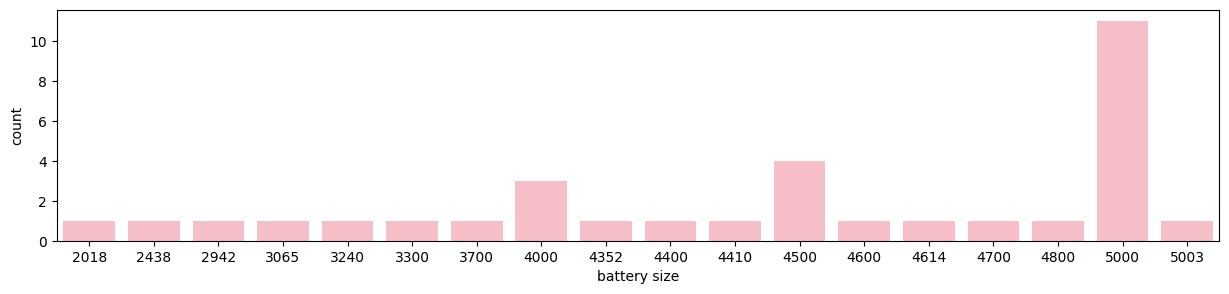

In [19]:
batterySize_counts = data['battery size'].value_counts()
print(batterySize_counts)

#show grafik
plt.figure(figsize=(15, 3))
sns.countplot(data=data, x=data['battery size'], color='#FFB6C1')
plt.show()

Hasil dari kode di atas menunjukkan informasi berikut:

- Terdapat 18 kategori ukuran baterai.
- Kategori ukuran baterai `5000` memiliki jumlah terbanyak, yaitu 11.

****
Menghitung screen size untuk setiap kategori

screen size
6.7    8
6.5    6
6.1    5
6.6    4
6.4    4
6.8    2
5.4    1
4.7    1
5.9    1
7.6    1
Name: count, dtype: int64


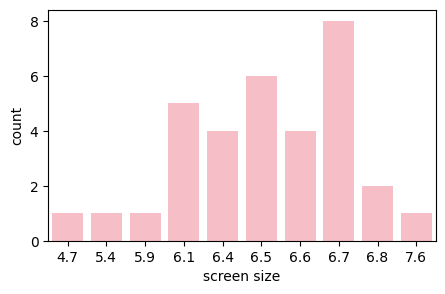

In [20]:
screenSize_counts = data['screen size'].value_counts()
print(screenSize_counts)

#show grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['screen size'], color='#FFB6C1')
plt.show()

Hasil dari kode di atas menunjukkan informasi berikut:

- Terdapat sepuluh kategori Screen Size
- Kategori ukuran layar `6.7` memiliki jumlah terbanyak, yaitu 8

****
Menghitung jumlah weight untuk setiap kategori

Jumlah setiap kategori berat: 27
5: 204
2: 195 215
1: 141 144 167 169 173 174 178 179 183 188 189 190 194 196 201 203 205 207 210 218 225 228 240 271


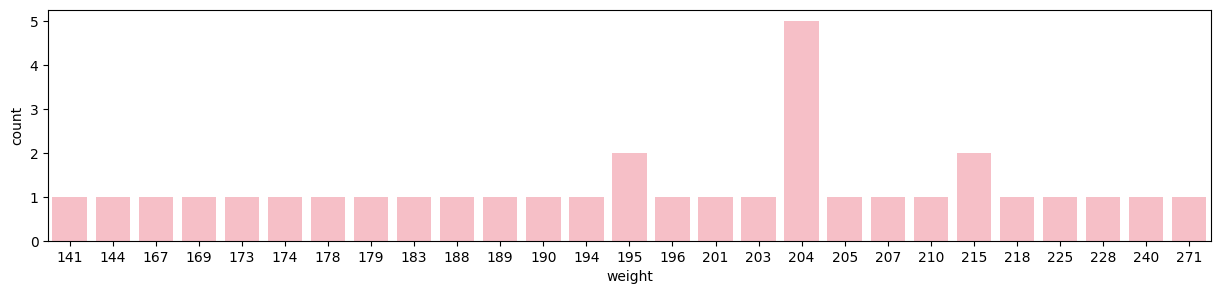

In [21]:
weighted_counts = data['weight'].value_counts()
print('Jumlah setiap kategori berat:', len(weighted_counts))

#group
from collections import defaultdict
freq_groups = defaultdict(list)
for weight, count in weighted_counts.items():
    freq_groups[count].append(weight)
for count in sorted(freq_groups.keys(), reverse=True):
    weights = sorted(freq_groups[count])
    weights_str = ' '.join(map(str, weights))
    print(f"{count}: {weights_str}")

#show grafik
plt.figure(figsize=(15, 3))
sns.countplot(data=data, x=data['weight'], color='#FFB6C1')
plt.show()

Hasil dari kode di atas menunjukkan informasi berikut:

- Terdapat 27 kategori weight
- Kategori berat `204` memiliki jumlah terbanyak, yaitu 5

****
Analisis release date berdasarkan tahun

release_year
2018     1
2021    16
2022    16
Name: count, dtype: int64


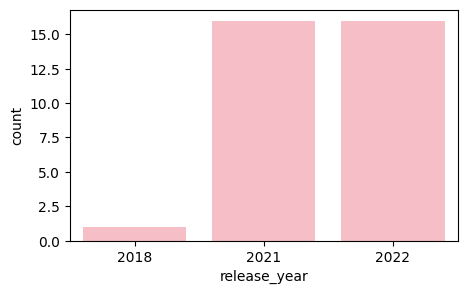

In [22]:
data_new = data.copy()
data_new['release date'] = pd.to_datetime(data['release date'], format='%d/%m/%Y')
data_new['release_year'] = data_new['release date'].dt.year
release_year_counts = data_new['release_year'].value_counts().sort_index()
print(release_year_counts)

#show grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data_new['release_year'], color='#FFB6C1')
plt.show()

Hasil dari kode di atas menunjukkan informasi berikut:

- Terdapat 3 kategori tahun.
- Tahun 2021 dan 2022 memiliki jumlah terbanyak, masing-masing dengan total 16
- Tahun 2018 memiliki jumlah paling sedikit, yaitu 1

### Rating

Melakukan analisis jumlah review yang dilakukan oleh setiap pengguna dan memeriksa apakah ada pengguna yang memiliki jumlah review yang berbeda dibandingkan dengan pengguna lainnya.

In [23]:
user_review_counts = ratings['user_id'].value_counts()
print(user_review_counts)

#nilai unik
print(f"Jumlah nilai unik review: {user_review_counts.unique()}")

user_id
0      10
1      10
6      10
8      10
10     10
       ..
254    10
255    10
256    10
257    10
258    10
Name: count, Length: 99, dtype: int64
Jumlah nilai unik review: [10]


Hasil dari kode di atas menunjukkan bahwa setiap pengguna memberikan review sebanyak sepuluh kali, dan semua pengguna memiliki jumlah review yang sama, yaitu sepuluh

****
Menghitung frekuensi kemunculan cellphone yang direview

Jumlah frekuensi kemunculan setiap cellphone:
cellphone_id
0     20
1     24
2     27
3     29
4     34
5     31
6     30
7     29
8     39
9     29
10    27
11    22
12    32
13    32
14    27
15    38
16    31
17    30
18    31
19    31
20    30
21    20
22    30
23    24
24    35
25    38
26    28
27    34
28    26
29    25
30    41
31    31
32    35
Name: count, dtype: int64
Minimum: 20
Maximum: 41


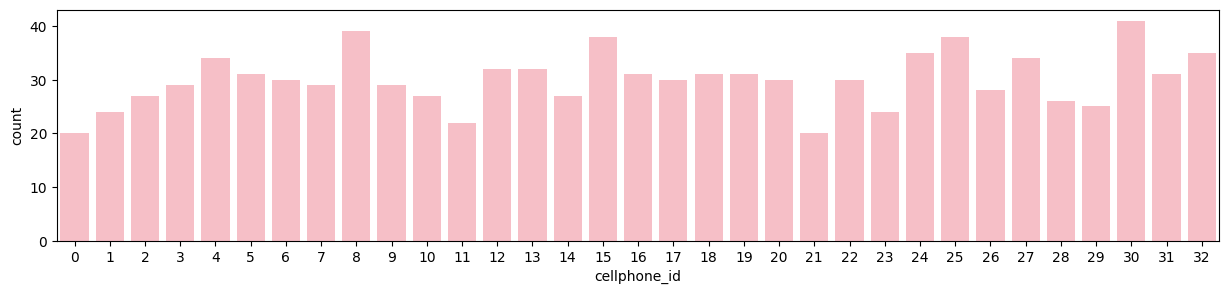

In [24]:
cellphone_review_counts = ratings['cellphone_id'].value_counts()
print("Jumlah frekuensi kemunculan setiap cellphone:")
print(cellphone_review_counts.sort_index())

#nilai unik
print("Minimum:", cellphone_review_counts.min())
print("Maximum:", cellphone_review_counts.max())

#show grafik
plt.figure(figsize=(15,3))
sns.countplot(data=ratings, x=ratings['cellphone_id'], color='#FFB6C1')
plt.show()

Hasil dari kode di atas menunjukkan bahwa ponsel yang paling sering direview memiliki total 41 review, sementara ponsel yang paling sedikit direview hanya memiliki 20 review

****
Menghitung jumlah rating untuk setiap kategori


Jumlah frekuensi setiap rating:
 rating
1      74
2      44
3      30
4      39
5      68
6     112
7     169
8     195
9     128
10    130
18      1
Name: count, dtype: int64


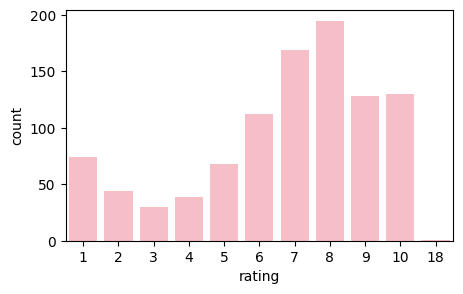

In [25]:
ratings_counts = ratings['rating'].value_counts()
print("\nJumlah frekuensi setiap rating:\n", ratings_counts.sort_index())

#show grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=ratings, x=ratings['rating'], color='#FFB6C1')
plt.show()

Hasil dari kode di atas menunjukkan informasi berikut:

- Skala rating berkisar antara 0 hingga 10.
- Rating terbanyak memiliki nilai 8 dan rating tersedikit memiliki nilai 3
- Terdapat outliers, yaitu rating dengan nilai 18.

### User


Total frekuensi age:
 age
21     1
23     1
25    12
27     3
28     3
29     5
30     6
31     4
32    10
33     5
34     3
35     3
36     1
37     4
38     5
39     3
40     2
41     2
42     4
43     1
45     1
46     3
48     2
49     2
50     5
55     1
56     2
57     1
58     2
61     2
Name: count, dtype: int64


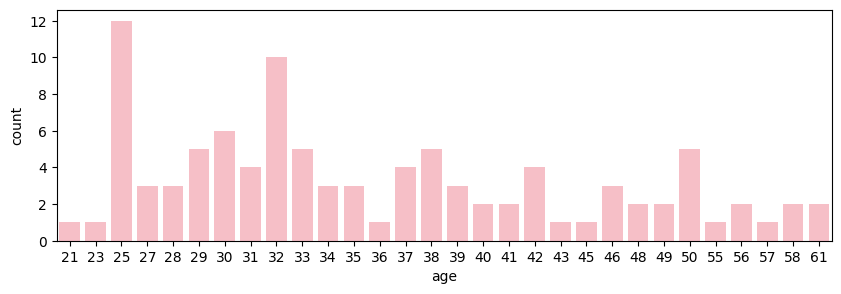

In [26]:
#count age X muncul berapa kali
age_counts = users['age'].value_counts()
print("\nTotal frekuensi age:\n", age_counts.sort_index())

#show grafik
plt.figure(figsize=(10, 3))
sns.countplot(data=users, x=users['age'], color='#FFB6C1')
plt.show()

Hasil dari kode di atas menunjukkan informasi berikut:

- Usia tertua dari pengguna adalah 61 tahun
- Usia termuda dari pengguna adalah 21 tahun
- Pengguna dengan usia 25 tahun memiliki jumlah terbanyak, yaitu 12

****
Menghitung seluruh kategori gender


Total frekuensi gender:
 gender
Male               50
Female             46
-Select Gender-     3
Name: count, dtype: int64


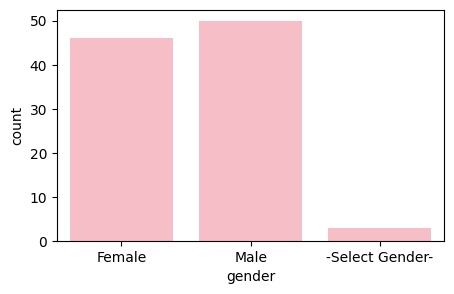

In [27]:
user_counts = users['gender'].value_counts()
print("\nTotal frekuensi gender:\n", user_counts)

#show grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=users, x=users['gender'], color='#FFB6C1')
plt.show()

Hasil dari kode di atas menunjukkan informasi berikut:

- Jumlah pengguna dengan gender female adalah 46
- Jumlah pengguna dengan gender male adalah 50
- Terdapat outliers, yaitu kategori `Select Gender`

****
menghitung jumlah munculnya occupation

In [28]:
occupation_counts = users['occupation'].str.lower().value_counts()
print('Total occupation: ', len(occupation_counts))
print("\nTotal frekuensi occupation:\n", occupation_counts)

Total occupation:  45

Total frekuensi occupation:
 occupation
manager                             18
information technology              12
it                                   6
administrative officer               5
software developer                   4
security                             3
sales                                3
team leader                          2
finance                              2
healthcare                           2
accountant                           2
worker                               2
data analyst                         2
construction                         2
sales manager                        2
education                            2
team worker in it                    1
qa software manager                  1
ict officer                          1
ops manager                          1
executive                            1
web design                           1
warehousing                          1
technical engineer                   1
i

Hasil dari kode di atas menunjukkan informasi berikut:

- Terdapat 45 jenis pekerjaan
- Terdapat kesalahan penulisan pada kata `healthare`
- Pekerjaan `information technology` dan `it` dapat digabungkan

## Data Preprocessing

In [29]:
#menggabungkan dataset data, ratings, dan users
ratings_data = pd.merge(ratings, data, on='cellphone_id')
merged_data = pd.merge(ratings_data, users, on='user_id')
merged_data.head()

,user_id,cellphone_id,rating,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,age,gender,occupation
0,0,30,1,Motorola,Moto G Play (2021),Android,32,3,1.42,13,5,5000,6.5,204,159,14/01/2021,38,Female,Data analyst
1,0,5,3,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018,38,Female,Data analyst
2,0,10,9,Samsung,Galaxy S22,Android,128,8,8.81,50,10,3700,6.1,167,528,25/02/2022,38,Female,Data analyst
3,0,9,3,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022,38,Female,Data analyst
4,0,23,2,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2022,38,Female,Data analyst


In [30]:
#check missing value
merged_data.isnull().sum()

,0
user_id,0
cellphone_id,0
rating,0
brand,0
model,0
operating system,0
internal memory,0
RAM,0
performance,0
main camera,0


Hasil dari kode di atas menunjukkan terdapat 10 missing value pada kolom occupation

****
Menampilkan data dari baris yang memiliki missing value

In [31]:
rows_with_missing_values = merged_data[merged_data.isnull().any(axis=1)]
print(rows_with_missing_values)

     user_id  cellphone_id  rating     brand                 model  \
210       53            32       9  Motorola   Moto G Power (2022)   
211       53             5       8     Apple             iPhone XR   
212       53            15      10    Google             Pixel 6     
213       53             4       9     Apple     iPhone 13 Pro Max   
214       53            26       9    Xiaomi                12 Pro   
215       53             9       8   Samsung            Galaxy A53   
216       53             7       8   Samsung            Galaxy A13   
217       53            29       8  Motorola  Moto G Stylus (2022)   
218       53            25       9    Xiaomi               11T Pro   
219       53            17       8    Google          Pixel 6 Pro    

    operating system  internal memory  RAM  performance  main camera  \
210          Android               64    4         1.35           50   
211              iOS               64    3         4.22           12   
212          

Hasil dari kode di atas menunjukkan bahwa, sebagaimana ditemukan dalam analisis univariate, terdapat outlier pada kolom gender, yaitu `Select Gender`, yang ternyata terkait dengan nilai NaN pada kolom occupation. Oleh karena itu, akan dilakukan drop

In [32]:
#drop missing value
merged_data = merged_data.dropna()

In [33]:
#check missing value
merged_data.isnull().sum()

,0
user_id,0
cellphone_id,0
rating,0
brand,0
model,0
operating system,0
internal memory,0
RAM,0
performance,0
main camera,0


Setelah melakukan drop, tidak ada lagi missing value

In [34]:
merged_data = merged_data.copy()
merged_data['occupation'] = merged_data['occupation'].str.lower()
merged_data['occupation'] = merged_data['occupation'].replace('healthare', 'healthcare')
merged_data['occupation'] = merged_data['occupation'].replace('it', 'information technology')

print("Data occupation berhasil dimodifikasi")

Data occupation berhasil dimodifikasi


In [35]:
#show dataset
clean_data = merged_data
clean_data

,user_id,cellphone_id,rating,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,age,gender,occupation
0,0,30,1,Motorola,Moto G Play (2021),Android,32,3,1.42,13,5,5000,6.5,204,159,14/01/2021,38,Female,data analyst
1,0,5,3,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018,38,Female,data analyst
2,0,10,9,Samsung,Galaxy S22,Android,128,8,8.81,50,10,3700,6.1,167,528,25/02/2022,38,Female,data analyst
3,0,9,3,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022,38,Female,data analyst
4,0,23,2,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2022,38,Female,data analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,258,31,5,Motorola,Moto G Pure,Android,32,3,1.02,13,5,4000,6.5,188,129,14/10/2021,25,Male,executive manager
986,258,17,8,Google,Pixel 6 Pro,Android,128,12,7.19,50,11,5003,6.7,210,699,28/10/2021,25,Male,executive manager
987,258,23,9,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2022,25,Male,executive manager
988,258,27,8,Xiaomi,Poco F4,Android,128,8,6.98,64,20,4500,6.6,195,428,27/07/2022,25,Male,executive manager


## Data Preparation

In [36]:
#delete data yang duplikat
clean_data = clean_data.drop_duplicates('cellphone_id')

#konversi data series menjadi list
cellphone_id = clean_data['cellphone_id'].tolist()
brand = clean_data['brand'].tolist()
model = clean_data['model'].tolist()
operating_system = clean_data['operating system'].tolist()

print(len(cellphone_id))
print(len(brand))
print(len(model))
print(len(operating_system))

33
33
33
33


Membuat kamus untuk menentukan pasangan key-value. Karena TF-IDF hanya berlaku untuk data teks, maka hanya kolom dengan tipe data objek yang dipilih

In [37]:
#dictionary untuk menentukan pasangan key-value
data_dict = pd.DataFrame ({
    'cellphone_id': cellphone_id,
    'brand': brand,
    'model': model,
    'operating_system': operating_system
})

data_dict

,cellphone_id,brand,model,operating_system
0,30,Motorola,Moto G Play (2021),Android
1,5,Apple,iPhone XR,iOS
2,10,Samsung,Galaxy S22,Android
3,9,Samsung,Galaxy A53,Android
4,23,Vivo,X80 Pro,Android
5,8,Samsung,Galaxy A32,Android
6,22,Oppo,Find X5 Pro,Android
7,16,Google,Pixel 6a,Android
8,19,OnePlus,Nord 2T,Android
9,3,Apple,iPhone 13 Pro,iOS


## Model Development dengan Content Based Filtering

Assign datafram ke variabel baru

In [38]:
data = data_dict
print("assign berhasil")

assign berhasil


Developing a recommendation system

In [39]:
tf = TfidfVectorizer()
tf.fit(data['brand'])
tf.get_feature_names_out()

array(['apple', 'asus', 'google', 'motorola', 'oneplus', 'oppo',
       'samsung', 'sony', 'vivo', 'xiaomi'], dtype=object)

In [40]:
#fit dan transform ke matriks
tfidf_matrix = tf.fit_transform(data['brand'])
tfidf_matrix.shape

(33, 10)

In [41]:
tfidf_matrix.todense()

matrix([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],


****
Menampilkan matriks TF-IDF untuk beberapa model dan brand

In [42]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.model
).sample(10, axis=1).sample(10, axis=0)

,oneplus,motorola,sony,asus,google,oppo,xiaomi,apple,vivo,samsung
model,,,,,,,,,,
iPhone XR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Redmi Note 11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
X80 Pro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
iPhone 13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Zenfone 8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Moto G Pure,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pixel 6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Pixel 6a,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Moto G Play (2021),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Menghitung similarity degree antar model dengan teknik cosine similarity

In [43]:
cosine_similarity = cosine_similarity(tfidf_matrix)
cosine_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

Matriks kesamaan untuk setiap model dengan menampilkan nama model pada 33 sampel kolom (axis = 1) dan 10 sampel baris (axis = 0).

In [44]:
cosine_similarity_df = pd.DataFrame(cosine_similarity, index=data['model'], columns=data['model'])
print('Shape:', cosine_similarity_df.shape)
cosine_similarity_df.sample(33, axis=1).sample(10, axis=0)

Shape: (33, 33)


model,11T Pro,10 Pro,Galaxy S22 Ultra,Redmi Note 11,Nord 2T,Moto G Power (2022),Galaxy S22 Plus,Moto G Stylus (2022),12 Pro,Pixel 6a,...,Pixel 6 Pro,iPhone 13 Pro,Galaxy Z Fold 3,Zenfone 8,iPhone 13 Pro Max,10T,iPhone 13,Nord N20,Galaxy A13,Galaxy S22
model,,,,,,,,,,,,,,,,,,,,,
Zenfone 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Galaxy A32,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
10T,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
11T Pro,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Pro,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
Galaxy Z Fold 3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Pixel 6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Galaxy A53,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Galaxy S22 Ultra,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [45]:
#fungsi model_recommendations
def model_recommendations(model, similarity_data=cosine_similarity_df, items=data_dict[['model', 'brand', 'operating_system']], k=4):
    index = similarity_data.loc[:, model].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(model, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [46]:
#show hasil rekomendasi untuk Galaxy S22 Ultra
model_recommendations('Galaxy S22 Ultra')

,model,brand,operating_system
0,Galaxy Z Flip 3,Samsung,Android
1,Galaxy S22 Plus,Samsung,Android
2,Galaxy Z Fold 3,Samsung,Android
3,Galaxy A32,Samsung,Android


In [49]:
#show hasil rekomendasi untuk iphone 13
model_recommendations('iPhone 13')

,model,brand,operating_system
0,iPhone 13 Mini,Apple,iOS
1,iPhone SE (2022),Apple,iOS
2,iPhone XR,Apple,iOS
3,iPhone 13 Pro,Apple,iOS


## Model Development dengan Collaborative Filtering

In [50]:
#save dataset ratings pada variabel df
df = ratings
df

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2
...,...,...,...
985,258,31,5
986,258,17,8
987,258,23,9
988,258,27,8


In [51]:
#encode fitur user_id
user_ids = df['user_id'].unique().tolist()
print('List ID: ', user_ids)

user2user_encoded = {x: i for i, x in enumerate(user_ids)}
print('Encoded: ', user2user_encoded)

userencoded2user = {i: x for i, x in enumerate(user_ids)}
print('Encoded ke angka: ', userencoded2user)

List ID:  [0, 1, 6, 8, 10, 12, 16, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 37, 38, 52, 53, 56, 60, 74, 79, 80, 84, 85, 91, 95, 98, 99, 100, 104, 105, 106, 110, 111, 112, 113, 114, 115, 116, 119, 120, 123, 124, 126, 128, 129, 137, 140, 142, 143, 144, 145, 148, 152, 154, 156, 160, 162, 164, 169, 178, 183, 194, 200, 203, 204, 208, 211, 215, 226, 227, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 242, 243, 244, 245, 246, 251, 252, 253, 254, 255, 256, 257, 258]
Encoded:  {0: 0, 1: 1, 6: 2, 8: 3, 10: 4, 12: 5, 16: 6, 24: 7, 25: 8, 26: 9, 27: 10, 28: 11, 29: 12, 30: 13, 32: 14, 33: 15, 35: 16, 36: 17, 37: 18, 38: 19, 52: 20, 53: 21, 56: 22, 60: 23, 74: 24, 79: 25, 80: 26, 84: 27, 85: 28, 91: 29, 95: 30, 98: 31, 99: 32, 100: 33, 104: 34, 105: 35, 106: 36, 110: 37, 111: 38, 112: 39, 113: 40, 114: 41, 115: 42, 116: 43, 119: 44, 120: 45, 123: 46, 124: 47, 126: 48, 128: 49, 129: 50, 137: 51, 140: 52, 142: 53, 143: 54, 144: 55, 145: 56, 148: 57, 152: 58, 154: 59, 156: 60, 160: 61, 162: 62, 

In [52]:
#encode fitur cellphone_id
cellphone_ids = df['cellphone_id'].unique().tolist()
cellphone2cellphone_encoded = {x: i for i, x in enumerate(cellphone_ids)}
cellphoneencoded2cellphone = {i: x for i, x in enumerate(cellphone_ids)}

In [53]:
#mapping user_id dan cellphone_id
df['user'] = df['user_id'].map(user2user_encoded)
df['cellphone'] = df['cellphone_id'].map(cellphone2cellphone_encoded)

In [55]:
#show jumlah user
num_users = len(user2user_encoded)

#show jumlah cellphone
num_cellphones = len(cellphone2cellphone_encoded)

#change ratings menjadi float
df['rating'] = df['rating'].values.astype(np.float32)

#minimum rating
min_rating = min(df['rating'])

#maximum rating
max_rating = max(df['rating'])

print('Jumlah Pengguna: {}, Jumlah Ponsel: {}, Rating Minimum: {}, Rating Maksimum: {}'.format(
    num_users, num_cellphones, min_rating, max_rating
))

Jumlah Pengguna: 99, Jumlah Ponsel: 33, Rating Minimum: 1.0, Rating Maksimum: 18.0


Hasil dari kode di atas menunjukkan bahwa terdapat outlier pada fitur rating, yaitu nilai `18`. Outlier tersebut perlu di drop

In [56]:
#drop rating 18
df = df[df['rating'] != 18]

In [60]:
#check nilai max tidak lebih dari 10
min_ratings = min(df['rating'])
max_ratings = max(df['rating'])

print('Minimal ratings: {}, Maximum ratings: {}' .format (min_ratings, max_ratings))

Minimal ratings: 1.0, Maximum ratings: 10.0


In [61]:
#random dataset
df = df.sample(frac=1, random_state=42)

In [63]:
#mapping data user dan cellphone menjadi satu value
x = df[['user', 'cellphone']].values
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

#split dataset dengan komposisi 80:20
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print(x,y)

[[21 16]
 [33 19]
 [50 16]
 ...
 [86 30]
 [43 17]
 [10  8]] [0.47058824 0.47058824 0.41176471 0.23529412 0.47058824 0.35294118
 0.         0.47058824 0.29411765 0.35294118 0.52941176 0.11764706
 0.47058824 0.52941176 0.35294118 0.47058824 0.29411765 0.35294118
 0.41176471 0.41176471 0.23529412 0.05882353 0.35294118 0.29411765
 0.35294118 0.11764706 0.29411765 0.29411765 0.41176471 0.29411765
 0.05882353 0.41176471 0.41176471 0.47058824 0.23529412 0.29411765
 0.11764706 0.35294118 0.17647059 0.47058824 0.35294118 0.05882353
 0.29411765 0.41176471 0.41176471 0.29411765 0.47058824 0.47058824
 0.35294118 0.47058824 0.23529412 0.52941176 0.52941176 0.29411765
 0.29411765 0.41176471 0.29411765 0.35294118 0.23529412 0.47058824
 0.17647059 0.41176471 0.35294118 0.         0.17647059 0.41176471
 0.41176471 0.41176471 0.29411765 0.23529412 0.35294118 0.35294118
 0.23529412 0.35294118 0.52941176 0.35294118 0.52941176 0.47058824
 0.35294118 0.52941176 0.47058824 0.47058824 0.05882353 0.41176471
 0

In [64]:
#recmmenderNet
import tensorflow as tf
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_cellphones, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_cellphones = num_cellphones
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.cellphone_embedding = layers.Embedding(
            num_cellphones,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.cellphone_bias = layers.Embedding(num_cellphones, 1)
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        cellphone_vector = self.cellphone_embedding(inputs[:, 1])
        cellphone_bias = self.cellphone_bias(inputs[:, 1])

        dot_user_cellphone = tf.tensordot(user_vector, cellphone_vector, 2)
        x = dot_user_cellphone + user_bias + cellphone_bias
        return tf.nn.sigmoid(x)

In [65]:
#inisialisasi model dan compile
model = RecommenderNet(num_users, num_cellphones, embedding_size=50)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [66]:
#training
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val)
)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.7848 - root_mean_squared_error: 0.3031 - val_loss: 0.7754 - val_root_mean_squared_error: 0.2900
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7007 - root_mean_squared_error: 0.2373 - val_loss: 0.7669 - val_root_mean_squared_error: 0.2839
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6813 - root_mean_squared_error: 0.2094 - val_loss: 0.7606 - val_root_mean_squared_error: 0.2787
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6709 - root_mean_squared_error: 0.2046 - val_loss: 0.7532 - val_root_mean_squared_error: 0.2728
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6574 - root_mean_squared_error: 0.1880 - val_loss: 0.7494 - val_root_mean_squared_error: 0.2699
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6533 - root_mean_squared_error: 0.1792 - val_loss: 0.7449 - val_root_mean_squared_error: 0.2663
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss:

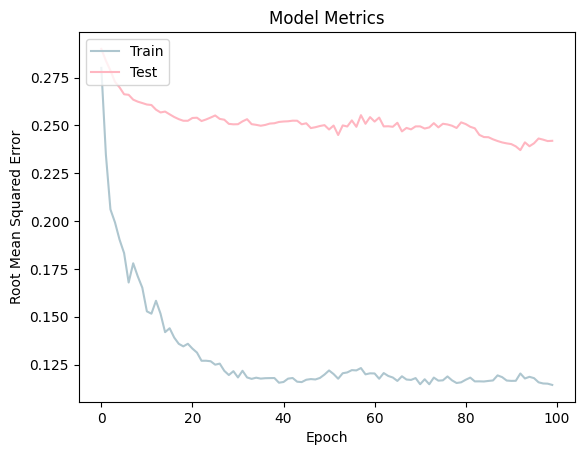

In [67]:
#show grafik proses
train_color = "#AEC6CF"
test_color = "#FFB6C1"

plt.plot(history.history['root_mean_squared_error'], color=train_color)
plt.plot(history.history['val_root_mean_squared_error'], color=test_color)
plt.title('Model Metrics')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

****


In [69]:
#membuat variabel untuk direkomendasikan
phone_df = data_dict
df = pd.read_csv('cratings.csv')

#sample user
user_id  = df.user_id.sample(1).iloc[0]
cellphone_review_counts = df[df.user_id == user_id]

cellphone_not_review = phone_df[~phone_df['cellphone_id'].isin(cellphone_review_counts.cellphone_id.values)]['cellphone_id']
cellphone_not_review = list(
    set(cellphone_not_review)
    .intersection(set(cellphone2cellphone_encoded.keys()))
)

cellphone_not_review = [[cellphone2cellphone_encoded.get(x)]for x in cellphone_not_review]
user_encoder = user2user_encoded.get(user_id)
user_cellphone_array = np.hstack(
    ([[user_encoder]] * len(cellphone_not_review), cellphone_not_review)
)

In [74]:
ratings = model.predict(user_cellphone_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_cellphones_ids = [
    cellphoneencoded2cellphone.get(cellphone_not_review[x][0]) for x in top_ratings_indices
]

print('Show recommendations for users: {}'.format(user_id))
print('----' *10 )
print('Cellphone with high rating from user')
print('----' *10 )

top_cellphones_user = (
    cellphone_review_counts.sort_values(by='rating', ascending=False)
    .head(5)
    .cellphone_id.values )

cellphone_df_rows = phone_df[phone_df['cellphone_id'].isin(top_cellphones_user)]
for row in cellphone_df_rows.itertuples():
  print(row.brand, ':', row.model)


print('----' * 10)
print('Top 10 cellphone recommendation for user')
print('----' * 10)

recommended_cellphones = phone_df[phone_df['cellphone_id'].isin(recommended_cellphones_ids)]
for row in recommended_cellphones.itertuples():
  print(row.brand, ':', row.model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Show recommendations for users: 10
----------------------------------------
Cellphone with high rating from user
----------------------------------------
Vivo : X80 Pro
Apple : iPhone 13 Pro
Apple : iPhone 13 Pro Max
Xiaomi : Poco F4
Samsung : Galaxy Z Fold 3
----------------------------------------
Top 10 cellphone recommendation for user
----------------------------------------
Samsung : Galaxy S22
Samsung : Galaxy A53
Oppo : Find X5 Pro
Apple : iPhone 13 Mini
Xiaomi : 11T Pro
OnePlus : 10 Pro
Apple : iPhone SE (2022)
Google : Pixel 6 Pro 
Xiaomi : 12 Pro
Apple : iPhone 13
